In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import PIL

### Building AlexNet's Model

In [2]:
num_classes = 2

model = tf.keras.Sequential([
    
    layers.Conv2D(96, 11, strides=4),
    layers.Activation('relu'),
    layers.MaxPooling2D(3, strides=2),
    
    layers.Conv2D(256, 5, padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(3, strides=2),
    
    layers.Conv2D(384, 3, padding='same'),
    layers.Activation('relu'),
    
    layers.Conv2D(384, 3, padding='same'),
    layers.Activation('relu'),
    
    layers.Conv2D(256, 3, padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(3, strides=2),
    
    layers.Flatten(),
    
    layers.Dense(9216),
    layers.Activation('relu'),
    
    layers.Dense(4096),
    layers.Activation('relu'),
    
    layers.Dense(4096),
    layers.Activation('relu'),
    
    layers.Dense(num_classes),
    layers.Activation('softmax')
])

In [3]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

### Dataset 1

In [4]:
train_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/ct-sub-datasets/train',
                                                               image_size=(227, 227),
                                                               batch_size=32,
                                                               label_mode='categorical')

val_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/ct-sub-datasets/val/',
                                                             image_size=(227, 227),
                                                             batch_size=32,
                                                             label_mode='categorical')

test_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/ct-sub-datasets/test/',
                                                             image_size=(227, 227),
                                                             batch_size=32,
                                                             label_mode='categorical')

Found 425 files belonging to 2 classes.
Found 118 files belonging to 2 classes.
Found 203 files belonging to 2 classes.


In [5]:
results = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 50,
    validation_data = val_ds,
    verbose=1,
)

model.save("./AlexNet_dataset_1")

Epoch 1/50
14/14 [==============================] - 3s 223ms/step - loss: 5448.1299 - accuracy: 0.5035 - val_loss: 0.7177 - val_accuracy: 0.5085
Epoch 2/50
14/14 [==============================] - 3s 182ms/step - loss: 0.6788 - accuracy: 0.5012 - val_loss: 0.9719 - val_accuracy: 0.4661
Epoch 3/50
14/14 [==============================] - 3s 181ms/step - loss: 0.6221 - accuracy: 0.6212 - val_loss: 0.8537 - val_accuracy: 0.4661
Epoch 4/50
14/14 [==============================] - 3s 181ms/step - loss: 0.6326 - accuracy: 0.6353 - val_loss: 0.6827 - val_accuracy: 0.5339
Epoch 5/50
14/14 [==============================] - 3s 181ms/step - loss: 0.6059 - accuracy: 0.6282 - val_loss: 0.7764 - val_accuracy: 0.4576
Epoch 6/50
14/14 [==============================] - 3s 183ms/step - loss: 0.5854 - accuracy: 0.6353 - val_loss: 0.7100 - val_accuracy: 0.5000
Epoch 7/50
14/14 [==============================] - 3s 185ms/step - loss: 0.5764 - accuracy: 0.6612 - val_loss: 3.4272 - val_accuracy: 0.4068
Epo

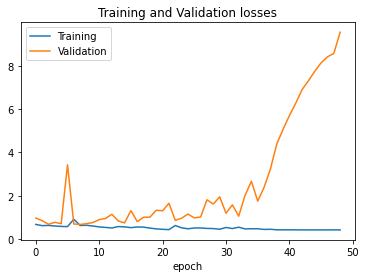

In [6]:
results.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'][1:])
plt.plot(results.history['val_loss'][1:])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.savefig("../project/AlexNet_ds_1.png")

In [7]:
model.evaluate(test_ds)

7/7 [==============================] - 0s 52ms/step - loss: 6.2419 - accuracy: 0.6010


[6.2419209480285645, 0.6009852290153503]

### Dataset 2

In [8]:
train_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/data-try2/train',
                                                               image_size=(227, 227),
                                                               batch_size=32,
                                                               label_mode='categorical')

val_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/data-try2/validation/',
                                                             image_size=(227, 227),
                                                             batch_size=32,
                                                             label_mode='categorical')

test_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/data-try2/test/',
                                                             image_size=(227, 227),
                                                             batch_size=32,
                                                             label_mode='categorical')

Found 612 files belonging to 2 classes.
Found 99 files belonging to 2 classes.
Found 91 files belonging to 2 classes.


In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
results = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 50,
    validation_data = val_ds,
    verbose=1,
)

model.save("./AlexNet_dataset_2")

Epoch 1/50
20/20 [==============================] - 3s 170ms/step - loss: 1.6279 - accuracy: 0.5229 - val_loss: 0.6954 - val_accuracy: 0.4646
Epoch 2/50
20/20 [==============================] - 2s 105ms/step - loss: 0.6923 - accuracy: 0.5703 - val_loss: 1.6324 - val_accuracy: 0.5354
Epoch 3/50
20/20 [==============================] - 2s 105ms/step - loss: 0.7365 - accuracy: 0.6029 - val_loss: 0.8001 - val_accuracy: 0.6162
Epoch 4/50
20/20 [==============================] - 2s 105ms/step - loss: 0.7390 - accuracy: 0.5980 - val_loss: 0.6933 - val_accuracy: 0.5253
Epoch 5/50
20/20 [==============================] - 2s 105ms/step - loss: 0.6806 - accuracy: 0.5082 - val_loss: 1.1307 - val_accuracy: 0.5051
Epoch 6/50
20/20 [==============================] - 2s 105ms/step - loss: 0.7309 - accuracy: 0.5049 - val_loss: 0.6938 - val_accuracy: 0.4949
Epoch 7/50
20/20 [==============================] - 2s 105ms/step - loss: 0.6939 - accuracy: 0.4951 - val_loss: 0.6932 - val_accuracy: 0.4949
Epoch 

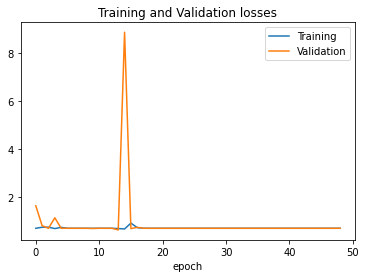

In [11]:
results.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'][1:])
plt.plot(results.history['val_loss'][1:])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.savefig("../project/AlexNet_ds_2.png")

In [12]:
model.evaluate(test_ds)

3/3 [==============================] - 0s 103ms/step - loss: 0.6931 - accuracy: 0.5055


[0.6930893063545227, 0.5054945349693298]

### Dataset 3

In [13]:
train_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/kaggle-large-ct/train/',
                                                               image_size=(227, 227),
                                                               validation_split=0.2,
                                                               subset="training",
                                                               seed=123,
                                                               batch_size=32,
                                                               label_mode='categorical')

val_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/kaggle-large-ct/train/',
                                                             image_size=(227, 227),
                                                             validation_split=0.2,
                                                             subset="validation",
                                                             seed=123,
                                                             batch_size=32,
                                                             label_mode='categorical')

test_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/kaggle-large-ct/test/',
                                                             image_size=(227, 227),
                                                             batch_size=32,
                                                             label_mode='categorical')

Found 2233 files belonging to 2 classes.
Using 1787 files for training.
Found 2233 files belonging to 2 classes.
Using 446 files for validation.
Found 248 files belonging to 2 classes.


In [14]:
results = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 50,
    validation_data = val_ds,
    verbose=1,
)

model.save("./AlexNet_dataset_3")

Epoch 1/50
56/56 [==============================] - 14s 242ms/step - loss: 0.6931 - accuracy: 0.5104 - val_loss: 0.6938 - val_accuracy: 0.4821
Epoch 2/50
56/56 [==============================] - 11s 204ms/step - loss: 0.6932 - accuracy: 0.5104 - val_loss: 0.6936 - val_accuracy: 0.4821
Epoch 3/50
56/56 [==============================] - 11s 203ms/step - loss: 0.6931 - accuracy: 0.5104 - val_loss: 0.6941 - val_accuracy: 0.4821
Epoch 4/50
56/56 [==============================] - 11s 205ms/step - loss: 0.6931 - accuracy: 0.5104 - val_loss: 0.6941 - val_accuracy: 0.4821
Epoch 5/50
56/56 [==============================] - 11s 203ms/step - loss: 0.6930 - accuracy: 0.5104 - val_loss: 0.6942 - val_accuracy: 0.4821
Epoch 6/50
56/56 [==============================] - 11s 204ms/step - loss: 0.6930 - accuracy: 0.5104 - val_loss: 0.6939 - val_accuracy: 0.4821
Epoch 7/50
56/56 [==============================] - 12s 207ms/step - loss: 0.6932 - accuracy: 0.5104 - val_loss: 0.6937 - val_accuracy: 0.4821

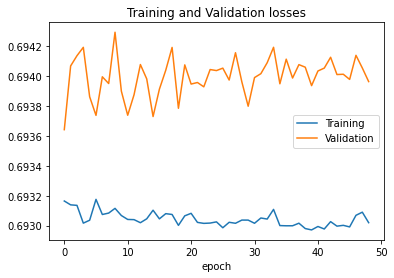

In [15]:
results.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'][1:])
plt.plot(results.history['val_loss'][1:])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.savefig("../project/AlexNet_ds_3.png")

In [16]:
model.evaluate(test_ds)

8/8 [==============================] - 0s 56ms/step - loss: 0.6932 - accuracy: 0.5040


[0.6931655406951904, 0.5040322542190552]

### Dataset 4

In [18]:
from keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_ds = training_datagen.flow_from_directory(r'../datasets/CovidDataset/Train',
                                                target_size=(227, 227),
                                                class_mode='categorical')

val_ds = test_datagen.flow_from_directory(r'../datasets/CovidDataset/Val/',
                                          target_size=(227, 227),
                                          class_mode='categorical')

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [19]:
results = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 50,
    validation_data = val_ds,
    verbose=1,
)

model.save("./AlexNet_dataset_4")

Epoch 1/50
7/7 [==============================] - 9s 1s/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/50
7/7 [==============================] - 8s 1s/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/50
7/7 [==============================] - 8s 1s/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/50
7/7 [==============================] - 7s 1s/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/50
7/7 [==============================] - 7s 999ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/50
7/7 [==============================] - 7s 1s/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/50
7/7 [==============================] - 7s 1s/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/50
7/7 [======================

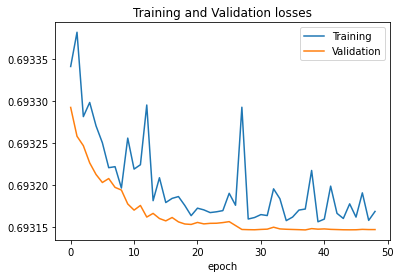

In [20]:
results.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'][1:])
plt.plot(results.history['val_loss'][1:])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.savefig("../project/AlexNet_ds_4.png")